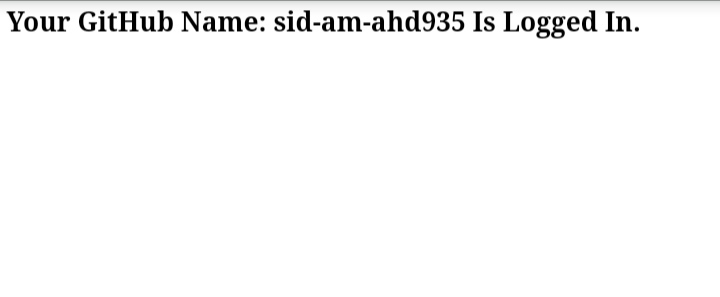

In [1]:
from flask import Flask, render_template, request, redirect, url_for
from flask_dance.contrib.github import make_github_blueprint, github

import os;
#Use Before Starting The POST request
#export OAUTHLIB_INSECURE_TRANSPORT=1
#When doing from The Terminal Itself.
os.environ["OAUTHLIB_INSECURE_TRANSPORT"]= '1'

if __name__ == "__main__":
    app = Flask(__name__)
    app.config['SECRET_KEY'] = "why is secret key even a thing"
else:
    from model import app
     
github_blueprint = make_github_blueprint(client_id= '4e3dcb3a3ab315603b54', client_secret= '42f934578b962fff88db8d4cca21701496c40c51')

app.register_blueprint(github_blueprint,url_prefix='/github/login')

@app.route('/github')
def github_login():
    
    if  not github.authorized:
        return redirect(url_for('github.login'))
    account_info = github.get('/user')
    
    if account_info.ok:
        account_info_json = account_info.json()
        return f"<h1>Your GitHub Name: {account_info_json['login']} Is Logged In.</h1>"
        
    return "<h1> Request </h1>"

if __name__ == "__main__":
    app.run(port=9080)
    #'debug= True' Does Not Work In Jupyter

    

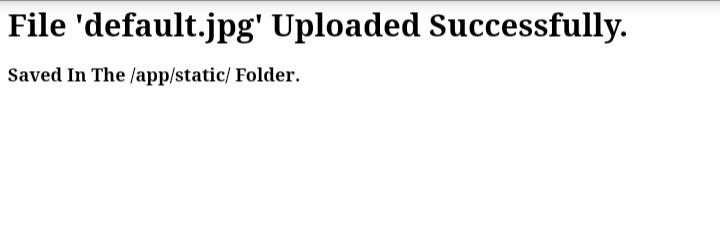

In [2]:
from flask import Flask, render_template, request, redirect, url_for
from werkzeug.utils import secure_filename
import os

if __name__ == "__main__":
    app = Flask(__name__)
    app.config['SECRET_KEY']= "random string to save myself from 'Secret Key' not found errors"
else:
    from model import app
    
@app.route('/upload')#,methods=['GET','POST'])
def upload_file():
    return render_template("upload.html")

@app.route('/uploader',methods=['GET','POST'])
def upload_file1():
    if request.method == 'POST':
        f = request.files['file']
        #f.save(secure_filename(f.filename))
        #Does Not Work On Heroku, Stuck At Loading
        #import pdb;pdb.set_trace()
        dir1 = os.getcwd()+'/static/'
        if not os.path.exists(dir1):
            os.mkdir(dir1)
        len_dir = str(len(os.listdir(dir1)))
        
        name = dir1 + len_dir +f.filename
        #if '.tiff' not in name and '.gif' not in name and '.jpeg' not in name and '.jpg' not in name and '.png' not in name:
        #   name = name + '.jpg'
        if '.tiff' in name or '.gif' in name or '.jpeg' in name or '.jpg' in name or '.png' in name:
            pass
        else:
            name = name + '.jpg'
        
        try:
            with open(name,'wb') as file:
                #file.write(f.stream.read())
                file.write(f.read())
            ans = f"<h1>File '{f.filename}' Uploaded Successfully.</h1>\n<h3>Saved In The {dir1} Folder.</h3>"
        except Exception as e:
            ans = f"<h3>{e} Occurred While Creating {name}</h3>"
        return ans
	

if __name__ == "__main__":
    #import pdb;pdb.set_trace()
    app.run(port= 9090, debug=True)